# Business understanding
In today’s digital age, social media platforms like Twitter provide a massive amount of real-time insights into consumer opinions, especially regarding products and services. For tech giants like Apple and Google, monitoring sentiment around their products can be a crucial business strategy. Understanding how consumers feel about their offerings—whether positively, negatively, or neutrally—helps inform marketing strategies, product development, and customer support.

## Project overview
This project aims to build a Natural Language Processing (NLP) model to analyze the sentiment of Tweets specifically related to Apple and Google products. The dataset consists of over 9,000 tweets that have been rated by human annotators as positive, negative, or neutral in sentiment. The goal is to create an accurate machine learning model capable of classifying these tweets based on the emotional tone of the content.

The task is not just about automating sentiment analysis; it's about delivering actionable insights that can be used to understand customer feedback, inform decision-making processes, and possibly predict how future product releases might be received by consumers. By building a reliable sentiment analysis tool, businesses like Apple and Google can respond to customer feedback more effectively and refine their strategies accordingly.

## Business problem
Apple and Google are two of the most influential tech companies globally, with millions of users and customers who actively discuss their products on platforms like Twitter. However, manually analyzing sentiment in these discussions would be both time-consuming and impractical given the sheer volume of tweets. Therefore, automating sentiment analysis using an NLP model will allow both companies to process and understand consumer opinions quickly and at scale. This could give them a competitive edge by allowing for a timely response to customer feedback, identifying emerging issues, and improving customer satisfaction and brand loyalty

## Project objectives
### Main Objective

- The primary objective is to develop an NLP-based machine learning model that can accurately classify the sentiment of tweets related to Apple and Google products as positive, negative, or neutral.
### Specific Objectives



## Justification
Understanding sentiment at scale is critical for organizations in highly competitive industries like tech. By automating the analysis of millions of tweets related to Apple and Google products, companies can quickly gauge customer satisfaction, identify emerging trends, and proactively address negative sentiments. Sentiment analysis also allows these companies to measure the impact of new product releases, marketing campaigns, and public relations efforts.

## Questions 

# Data understanding

## Data Collection
The dataset for this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 tweets labeled with sentiment (positive, negative, or neutral). These labeled examples provide a training set to build and evaluate the sentiment classification model. The data is enriched with various features such as tweet text, tweet ID, user ID, and the sentiment label, which is crucial for training the model.

To further improve the model, external data such as newer tweets about Apple and Google products or additional labeled sentiment datasets might be useful for retraining or fine-tuning.

### Load libraries

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import emoji
from nltk.tokenize import word_tokenize
import warnings 
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data

In [2]:
df = pd.read_csv("data/tweet_product_company.csv", encoding="latin-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [4]:
df.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6255,RT @mention Line for Source Code is even longe...,Apple,Negative emotion
4304,yawn RT @mention Apple set to open a pop-up sh...,Apple,Positive emotion
7329,want an ipad 2? here is your chance: Apple ope...,NaN,No emotion toward brand or product
5203,RT @mention #Android App Review: #SXSW Go. | {...,NaN,No emotion toward brand or product
2549,@mention do I get bonus points if I collect al...,NaN,No emotion toward brand or product


#  Data cleaning

## Correct formats

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- **tweet_text**: The data type `object` is appropriate as it contains text data.
- **emotion_in_tweet_is_directed_at**: The `object` type is suitable since it likely contains categorical or string values indicating emotion direction.
- **is_there_an_emotion_directed_at_a_brand_or_product**: The `object` type is correct as it likely holds categorical values (e.g., "Yes" or "No").


All columns have the correct data type (`object`) for their respective content.

## Missing Values

In [6]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

- The dataset has a total of 9093 rows.
- The **tweet_text** is the primary feature and is almost complete.
- The other two features have missing values and might require further preprocessing before use in sentiment analysis or classification tasks.



Removing rows with the missing value in **tweet_text** 

In [7]:
df.dropna(subset=["tweet_text"],inplace=True)
df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Removing column **emotion_in_tweet_is_directed_at**

In [8]:
product_names = df.emotion_in_tweet_is_directed_at.unique()
df.drop(columns=["emotion_in_tweet_is_directed_at"],inplace=True)
df.isna().sum() 

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [9]:
df["original_tweet"]= df.tweet_text

## Feature Engineering

### Lowercasing
Convert all `tweet_text` to lowercase to maintain consistency

In [10]:
df.tweet_text = df.tweet_text.str.lower()

**Converting Transcript to strings**

In [11]:
def transcription_to_strings(df): 
    # matches basic sad face :(, :-(
    sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]')  
    
    # matches crying face :'(, :'-(
    crying_face = re.compile(r'[:;8]?[\'\-]?\'\(')  
    
    # matches complex sad faces with slashes, tears, etc.
    complex_sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]\)?')  
    
    # edge case: faces with tears or creative symbols like T_T, TT_TT
    crying_edge_case = re.compile(r'(T_T|tt_t|TT_TT)')
    
    # apply pattern replacement across the DataFrame's text column
    df['tweet_text'] = df['tweet_text'].apply(lambda x: 
        crying_edge_case.sub('crying face', 
        complex_sad_face.sub('complex sad face', 
        crying_face.sub('crying face', 
        sad_face.sub('sad face', x)))))

transcription_to_strings(df)
    

**Dealing with emojis**

In [12]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = emoji.demojize(df.tweet_text.iloc[index])

**Replacing abbreviation with its full form**

In [13]:
import json

# Load abbreviation dictionary from abbr.txt
with open('abbr.txt', 'r') as file:
    abbr_dict = json.load(file)

# Function to expand abbreviations in a tweet
def expand_abbr_in_tweet(text):
    return " ".join([abbr_dict.get(word, word) for word in text.split()])

# Apply the function to each tweet in the DataFrame
df['tweet_text'] = df['tweet_text'].apply(expand_abbr_in_tweet)

### Removing Links
First check if there is any links

In [14]:
def extract_links(text):
    # Regular expression to match URLs
    links = re.findall(r'http\S+|www\S+', text)
    return links

# list to store links
links_list = df['tweet_text'].apply(extract_links)
#  list of stored lists and print all links found
all_links = [link for sublist in links_list for link in sublist]
if len(links_list):
    print("All links found in the dataset:")
else:
    print("No links") 

All links found in the dataset:


Removing links found

In [15]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = re.sub(r'http\S+|www\S+', '',df.tweet_text.iloc[index])

Checking if any links are remaining

In [16]:
def extract_links(text):
    # Regular expression to match URLs
    links = re.findall(r'http\S+|www\S+', text)
    return links

# list to store links
links_list = df['tweet_text'].apply(extract_links)
#  list of stored lists and print all links found
all_links = [link for sublist in links_list for link in sublist]
if len(all_links):
    print("Links found in the dataset:")
else:
    print("No links") 

No links


**Removing Usernames**

Checking for twitter usernames

In [17]:
def extract_usernames(text):
    # Regular expression to match #
    usernames = re.findall(r'@\S+', text)
    return usernames

def check_usernames():# list to store usernames
    usernames_list = df['tweet_text'].apply(extract_usernames)
    #  list of stored lists and print all usernames found
    all_usernames = [hashtag for sublist in usernames_list for hashtag in sublist]
    if len(all_usernames):
        print("Usernames found in the dataset")
    else:
        print("No usernames") 
check_usernames()

Usernames found in the dataset


In [18]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = re.sub(r'@\S+', '',df.tweet_text.iloc[index])

In [19]:
check_usernames()

No usernames


**Removing Hashtags**

Let us first check if there is any hashtags

In [20]:
def extract_hashtags(text):
    # Regular expression to match #
    hashtags = re.findall(r'#\S+', text)
    return hashtags

def check_hashtags():# list to store hashtags
    hashtags_list = df['tweet_text'].apply(extract_hashtags)
    #  list of stored lists and print all hashtags found
    all_hashtags = [hashtag for sublist in hashtags_list for hashtag in sublist]
    if len(all_hashtags):
        print("hashtags found in the dataset")
    else:
        print("No hashtags") 
check_hashtags()

hashtags found in the dataset


In [21]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = re.sub(r'#\S+', '',df.tweet_text.iloc[index])

In [22]:
check_hashtags()

No hashtags


**Removing Punctuation**

In [23]:
import string
# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the tweet_text column
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)

**Dealing with Numbers**

In [24]:
from num2words import num2words 
for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index]  
    words = text.split()
    
    # Initialize an empty list to store the converted words
    converted_text = []
    #  try-except to safely handle any errors during the conversion 
    for word in words:
        try:
            # If the word is a digit, convert it to its word form
            if word.isdigit():
                converted_word = num2words(int(word))
                converted_text.append(converted_word)
            else:
                converted_text.append(word)
        except Exception as e:
            # If there's an error, append the word as-is
            converted_text.append(word) 
    # Join the converted words back into a string
    df.tweet_text.iloc[index] = " ".join(converted_text)

**Spell Checking**

from spellchecker import SpellChecker

# Initialize the SpellChecker
spell = SpellChecker()

# Loop over each tweet in the DataFrame
for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index]
    words = text.split()
    
    # Initialize an empty list to store the corrected words
    corrected_text = []
    
    # Loop over each word in the tweet
    for word in words:
        # Check for spelling mistakes and correct them
        corrected_word = spell.correction(word)
        
        # If no correction is found, keep the original word
        if corrected_word is None:
            corrected_word = word
        
        corrected_text.append(corrected_word)
    
    # Join the corrected words back into a string
    df.tweet_text.iloc[index] = " ".join(corrected_text)


**Removing Stopwords**

In [25]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,i have a 3g iphone after three hrs tweeting at...,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know about awesome ipadiphone application that...,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,can not wait for two also they should sale the...,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,i hope this years festival isnt as crashy as t...,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,great stuff on fri marissa mayer google tim or...,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [26]:
stopwords_list = stopwords.words('english')  # Getting stopwords from NLTK

# converting all product names to lowercase
product_names= [str(name).lower() for name in product_names if not pd.isna(name)]
# extending the list with lowercase product names
stopwords_list.extend(product_names)

for index in range(df.tweet_text.shape[0]):
    tweet_text = df.tweet_text.iloc[index].split() 
    tweet_no_stopword = " ".join([word for word in tweet_text if word not in stopwords_list])
    df.tweet_text.iloc[index] = tweet_no_stopword

In [27]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,3g three hrs tweeting dead need upgrade plugin...,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know awesome ipadiphone application youll like...,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait two also sale,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,hope years festival isnt crashy years app,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,great stuff fri marissa mayer tim oreilly tech...,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### Tokenization

In [28]:
tokens_list = []
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = word_tokenize(df.tweet_text.iloc[index])

In [29]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,"[3g, three, hrs, tweeting, dead, need, upgrade...",Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,"[know, awesome, ipadiphone, application, youll...",Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,"[wait, two, also, sale]",Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,"[hope, years, festival, isnt, crashy, years, app]",Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"[great, stuff, fri, marissa, mayer, tim, oreil...",Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### Lemmatization

In [30]:
lemmatizer = WordNetLemmatizer()

for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index]
    tweet_text =[lemmatizer.lemmatize(word) for word in text]

#  Analysis

In [31]:
from nltk import FreqDist
tokens = []
for index in range(df.tweet_text.shape[0]):
    text=df.tweet_text.iloc[index]
    for word in text:tokens.append(word)
# Step 2: Create frequency distribution from the tokens
freqdist = FreqDist(tokens)

# Step 3: Get the 200 most common words (or less if there are fewer than 200)
most_common = freqdist.most_common(200)

# Step 4: Print or use the result
print(most_common)

[('link', 4284), ('retweet', 2903), ('store', 1465), ('two', 1257), ('new', 1093), ('austin', 842), ('amp', 722), ('application', 655), ('launch', 643), ('social', 623), ('popup', 597), ('today', 576), ('one', 537), ('circles', 528), ('sxsw', 482), ('network', 462), ('via', 435), ('line', 399), ('get', 393), ('hundred', 377), ('free', 364), ('called', 361), ('party', 332), ('major', 302), ('mobile', 300), ('like', 289), ('time', 272), ('temporary', 264), ('opening', 256), ('people', 255), ('im', 251), ('possibly', 244), ('great', 223), ('downtown', 222), ('see', 220), ('going', 218), ('day', 216), ('check', 215), ('maps', 214), ('thousand', 214), ('open', 210), ('go', 207), ('need', 203), ('mayer', 203), ('dont', 202), ('marissa', 192), ('four', 185), ('got', 183), ('know', 181), ('googles', 179), ('three', 174), ('come', 174), ('applications', 168), ('\x89ûï', 167), ('win', 166), ('first', 166), ('good', 165), ('us', 162), ('pop', 160), ('ipad2', 159), ('next', 148), ('want', 146), ('

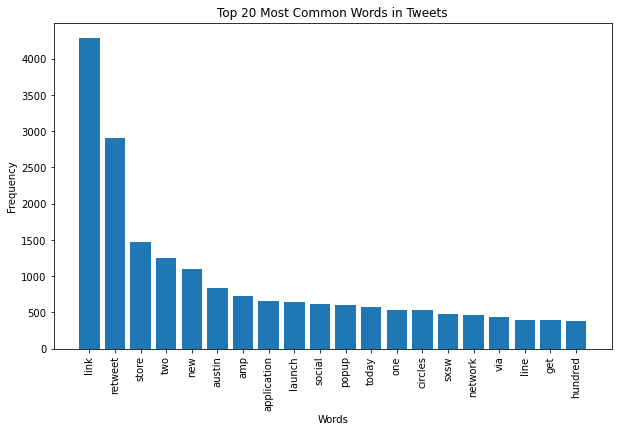

In [32]:
import matplotlib.pyplot as plt

# Get the top 20 most common words for visualization
top_20 = freqdist.most_common(20)

# Split the words and their frequencies into separate lists
words, frequencies = zip(*top_20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Preprocessing

# Modeling

# Evaluation

# Conclusion